<h1 align="center">  AIRBNB </b> </h1><br>
![](https://www.insuremyhouse.ie/wp-content/uploads/2019/09/11.png)

## Sobre o conjunto de dados

#### Conteúdo

Desde 2008 que hóspedes e anfitriões utilizam o Airbnb para expandir as possibilidades de viagem e apresentar uma forma mais única e personalizada de experienciar o mundo. Este conjunto de dados descreve a atividade de listagem e as métricas em NYC, NY para 2019.

#### Conteúdo

Este ficheiro de dados inclui todas as informações necessárias para saber mais sobre os hosts, a disponibilidade geográfica, as métricas necessárias para fazer previsões e tirar conclusões.

#### Agradecimentos

Este conjunto de dados público faz parte do Airbnb e a fonte original pode ser encontrada neste site.

#### Inspiração

O que podemos aprender sobre diferentes anfitriões e áreas?
O que podemos aprender com as previsões? (ex: localizações, preços, avaliações, etc.)
Quais os hosts mais ocupados e porquê?
Existe alguma diferença de tráfego notável entre as diferentes áreas e qual poderá ser a razão para tal?

O conjunto de dados que forneceu contém informações sobre as listagens do Airbnb na cidade de Nova Iorque para 2019, com as seguintes colunas principais:

- **id**: identificador único para cada listagem.
- **nome**: Nome da listagem.
- **host_id**: identificador único do host.
- **host_name**: Nome do host.
- **neighbourhood_group**: A maior área geográfica (bairro) onde se encontra a listagem, como Brooklyn ou Manhattan.
- **neighbourhood**: O bairro mais específico dentro do bairro.
- **latitude and longitude**: Coordenadas geográficas da listagem.
- **room_type**: Tipo de quarto listado (por exemplo, quarto privado, casa/apartamento inteiro).
- **price**: Preço por noite em USD.
- **minimum_nights**: Número mínimo de noites necessárias para reserva.
- **number_of_reviews**: Número total de avaliações que o anúncio recebeu.
- **last_review**: Data da revisão mais recente.
- **reviews_per_month**: Número médio de avaliações por mês.
- **calculated_host_listings_count**: Número total de listagens do mesmo host.
- **availability_365**: Número de dias em que o anúncio está disponível num ano.

Eis algumas ideias que podemos explorar com base neste conjunto de dados:

1. **Análise de anfitriões**: Identificar os anfitriões mais ocupados, analisando quais os anfitriões que têm mais listagens e comentários.
2. **Preço e localização**: Analise as tendências de preços por bairro ou distrito.
3. **Tráfego por área**: Explore o número de avaliações, a disponibilidade e a popularidade da listagem em diferentes bairros.
4. **Modelos de previsão**: Crie modelos de previsão para estimar o preço dos anúncios com base em caraterísticas como localização, tipo de quarto, disponibilidade e atividade do anfitrião.

### Passo 1: Exploração e Limpeza de Dados

- **Análise Exploratória de Dados (EDA)**: Vamos examinar o conjunto de dados para entender melhor sua distribuição, possíveis valores ausentes, e identificar outliers.
- **Tratamento de dados ausentes**: Como podemos ver, a coluna “last_review” tem valores ausentes. Precisamos decidir como lidar com esses valores e outros que encontrarmos.
- **Transformação de variáveis categóricas**: Variáveis como “neighbourhood_group”, “room_type”, e “host_name” precisam ser convertidas para um formato utilizável (por exemplo, codificação numérica) caso sejam utilizadas em modelagens futuras.


### Passo 2: Análise Exploratória

- **Distribuição de Preços**: Qual é a distribuição dos preços das propriedades? Existem áreas com preços muito altos ou baixos?
- **Popularidade de Anfitriões**: Quais são os anfitriões mais ativos em termos de número de propriedades e reviews?
- **Disponibilidade por Bairro**: Quais bairros têm a maior disponibilidade de dias para reserva?


### Passo 3: Modelagem Preditiva

- **Objetivo**: Prever o preço das propriedades com base em características como bairro, tipo de quarto, número de reviews, etc.
    - **Definir a variável-alvo**: Vamos prever a coluna ‘price’.
    - **Seleção de variáveis**: Escolher as colunas que mais afetam o preço (features).
- **Divisão de Dados**: Dividimos o dataset em treino e teste.
- **Criação de Modelos**:
    - Testar diferentes modelos como **Regressão Linear, Árvores de Decisão, Random Forest**, ou até mesmo **Gradient Boosting**.
- **Ajuste de Hiperparâmetros**: Otimizar os modelos através da validação cruzada e ajuste de hiperparâmetros.
- **Avaliação do Modelo**: Avaliar o desempenho dos modelos usando métricas como RMSE, R², etc.


### Passo 4: Insights e Conclusões

- Com base nos modelos e na análise exploratória, podemos responder perguntas como:
- O que determina o preço de uma propriedade?
- Quais bairros são mais populares ou têm preços mais altos?
- Quais anfitriões têm mais tráfego e o que os diferencia?

### Passo 5: Visualização de Dados

- Criar gráficos para apoiar os insights gerados:
- Distribuição de preços por bairro.
- Correlação entre disponibilidade e reviews.
- Mapas de calor para mostrar a densidade de listagens por localização.


### Importing Libraries

In [11]:
# Import packages

# For data manipulation
import numpy as np  # Biblioteca para arrays e funções matemáticas
import pandas as pd  # Biblioteca para manipulação de dados estruturados (dataframes)

# For data visualization
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos
import seaborn as sns  # Biblioteca para visualização de dados com gráficos estatísticos

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)  # Para exibir todas as colunas dos dataframes

# For data modeling
from xgboost import XGBClassifier  # Classificador XGBoost
from xgboost import XGBRegressor  # Regressor XGBoost
from xgboost import plot_importance  # Função para plotar a importância das variáveis no XGBoost

from sklearn.linear_model import LogisticRegression  # Regressão logística para modelagem preditiva
from sklearn.tree import DecisionTreeClassifier  # Modelo de árvore de decisão
from sklearn.ensemble import RandomForestClassifier  # Classificador de Random Forest

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split  # Para pesquisa de parâmetros e divisão de dados
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Métricas de avaliação de modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Matriz de confusão e visualização
from sklearn.metrics import classification_report  # Relatório de classificação com várias métricas
from sklearn.metrics import roc_auc_score, roc_curve  # AUC-ROC para avaliação de desempenho de classificadores
from sklearn.tree import plot_tree  # Para visualização de árvores de decisão

# For saving models
import pickle  # Biblioteca para salvar e carregar modelos treinados

# Adding KNeighborsClassifier and SVC
from sklearn.neighbors import KNeighborsClassifier  # Classificador KNN (K-Nearest Neighbors) para classificação baseada na proximidade
from sklearn.svm import SVC  # Suport Vector Classifier (SVC) para classificação com vetores de suporte


# Iniciar a medição do tempo
import time

from IPython import get_ipython

# Ativar comandos mágicos (se necessário)
get_ipython().run_line_magic('time', '')



CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 6.2 μs


### Loading Dataset

In [13]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
airbnb.shape

(48895, 16)

In [15]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### duplicated values

In [17]:
airbnb.duplicated().sum()

0

### missing value

In [19]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Colunas com valores ausentes:
- **name**: 16 valores ausentes.
- **host_name**: 21 valores ausentes.
- **last_review**: 10.052 valores ausentes.
- **reviews_per_month**: 10.052 valores ausentes.

As colunas **“last_review”** e **“reviews_per_month”** possuem uma quantidade significativa de valores ausentes, que provavelmente se devem a listagens sem avaliações. Podemos decidir como tratar esses valores conforme avançamos.

In [21]:
# Substituir valores ausentes na coluna 'reviews_per_month' por 0
airbnb['reviews_per_month'].fillna(0, inplace=True)

# Substituir valores ausentes na coluna 'last_review' por 'Never'
airbnb['last_review'].fillna('Never', inplace=True)

/var/folders/mp/_1mc66sj15dcx84w85zjp_fr0000gn/T/ipykernel_23345/3435159927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['reviews_per_month'].fillna(0, inplace=True)
/var/folders/mp/_1mc66sj15dcx84w85zjp_fr0000gn/T/ipykernel_23345/3435159927.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [62]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 3. Análise Exploratória

><i> Em <b>estatística</b>, a <b>análise exploratória de dados</b> é uma abordagem para a análise de conjuntos de dados de forma a resumir as suas principais características, muitas vezes com métodos visuais. </i>

#### Drop unnecessary columns

In [24]:
# Seleciona as colunas categóricas
categorical_cols = airbnb.select_dtypes(include=['object', 'category']).columns
print("Colunas categóricas:")
print(categorical_cols)

# Seleciona as colunas numéricas
numerical_cols = airbnb.select_dtypes(include=['number']).columns
print("\nColunas numéricas:")
print(numerical_cols)

Colunas categóricas:
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

Colunas numéricas:
Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


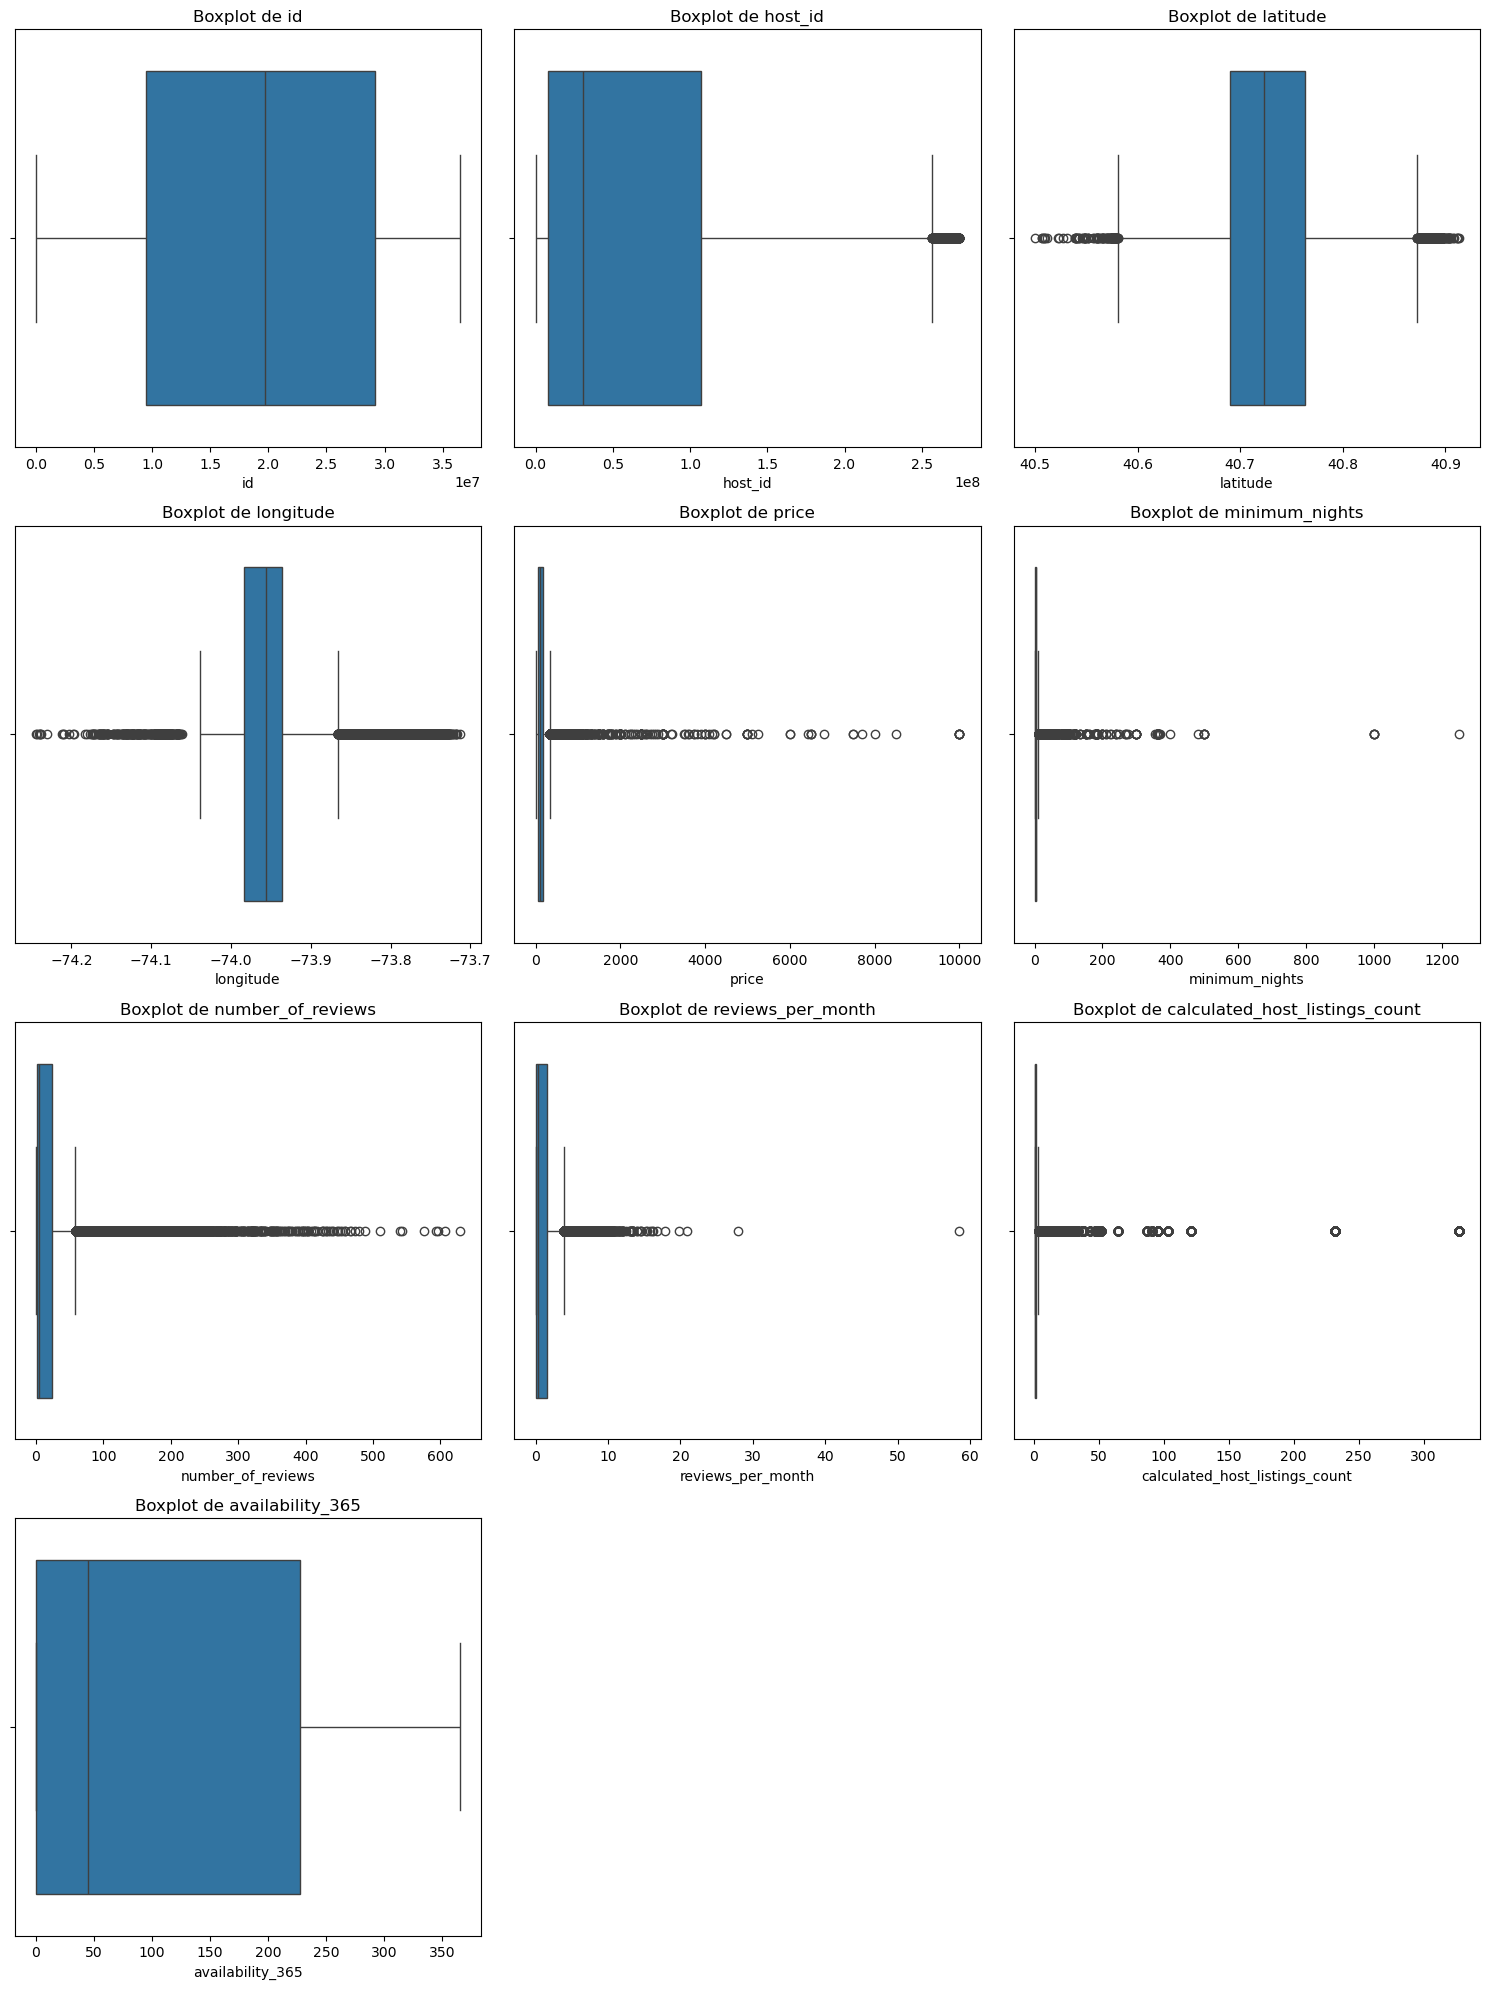

In [25]:
# Supondo que 'airbnb' seja o DataFrame e 'num_columns' seja a lista de colunas numéricas
num_columns = airbnb.select_dtypes(include='number').columns

# Definindo o número de linhas e colunas de acordo com a quantidade de gráficos
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calcula o número de linhas necessário

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(num_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=airbnb[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.savefig(f'Boxplot de {col}')
plt.show()

#### 4. Análise da Distribuição de Preços

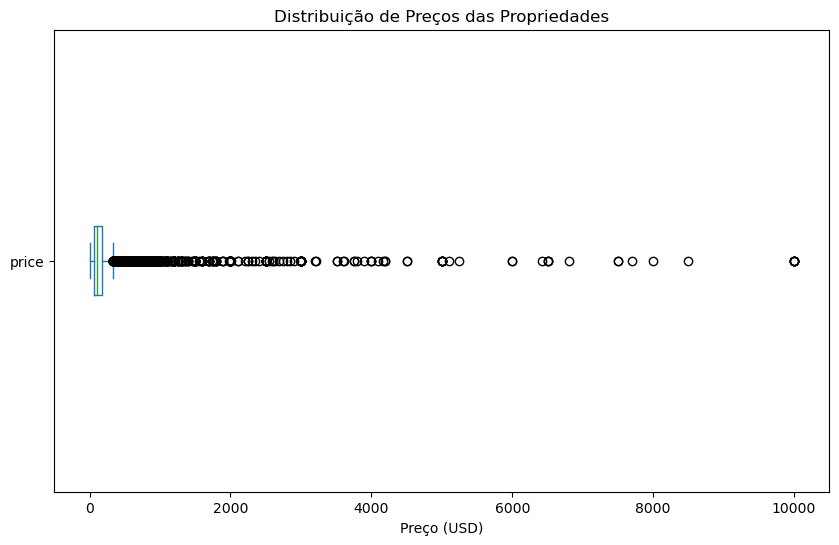

In [27]:
# Analisar a distribuição dos preços para identificar outliers
plt.figure(figsize=(10,6))
airbnb['price'].plot(kind='box', vert=False)
plt.title('Distribuição de Preços das Propriedades')
plt.xlabel('Preço (USD)')
plt.savefig('Distribuição de Preços das Propriedades.png')
plt.show()

A distribuição de preços das propriedades apresenta alguns outliers, com uma grande maioria dos preços concentrada em uma faixa mais baixa e algumas listagens com preços significativamente altos.

#### 1. Remoção de Outliers (Preços acima de $1000)

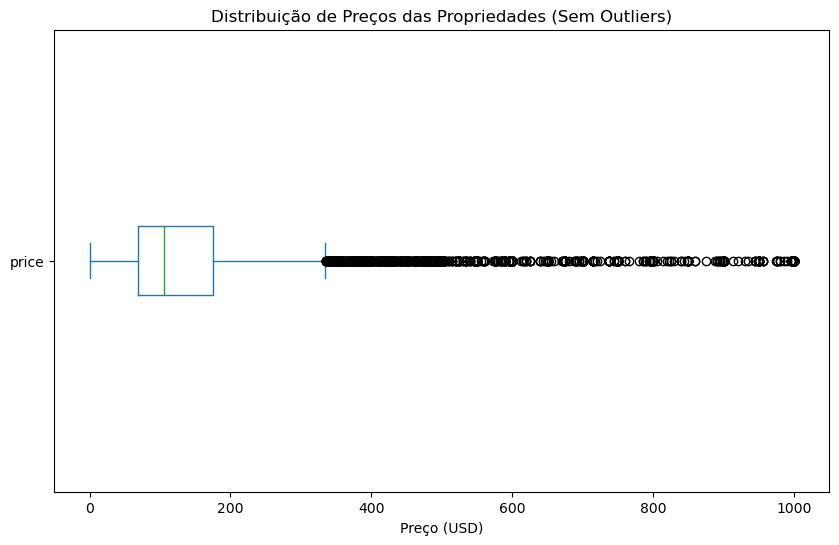

count    48656.000000
mean       141.279842
std        116.737468
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64


In [30]:
# Remoção de outliers (preços acima de $1000)
filtered_airbnb = airbnb[airbnb['price'] <= 1000]

# Visualizar a nova distribuição sem outliers
plt.figure(figsize=(10,6))
filtered_airbnb['price'].plot(kind='box', vert=False)
plt.title('Distribuição de Preços das Propriedades (Sem Outliers)')
plt.xlabel('Preço (USD)')
plt.savefig('Distribuição de Preços das Propriedades (Sem Outliers).png')
plt.show()

# Verificar estatísticas básicas para confirmar a remoção dos outliers
print(filtered_airbnb['price'].describe())

#### 2. Análise de Preços por Bairro (neighbourhood_group)

In [32]:
# Supondo que 'airbnb1' já está carregado
price_by_neighbourhood_group = airbnb1.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Definir um mapeamento fixo de cores para cada bairro
neighbourhood_colors = {
    'Manhattan': 'blue',
    'Brooklyn': 'green',
    'Queens': 'orange',
    'Bronx': 'red',
    'Staten Island': 'purple'
}

# Aplicar as cores fixas na ordem correta
colors = [neighbourhood_colors[neighbourhood] for neighbourhood in price_by_neighbourhood_group.index]

# Exibir gráfico de barras
plt.figure(figsize=(10, 8))
price_by_neighbourhood_group.plot(kind='bar', color=colors)
plt.title('Média de Preços por Bairro (neighbourhood_group)')
plt.ylabel('Preço Médio (USD)')
plt.xlabel('Bairro')
plt.xticks(rotation=45)
plt.savefig('Media_de_Precos_por_Bairro_neighbourhood_group.png')
plt.show()

# Exibir as médias de preço por bairro
print(price_by_neighbourhood_group)

NameError: name 'airbnb1' is not defined

Após a remoção dos outliers (preços acima de $1000), a nova distribuição de preços está mais concentrada e realista. A análise da média de preços por bairro (neighbourhood_group) mostra o seguinte:

- **Manhattan**: $178.94   

- **Brooklyn**: $117.81 

- **Staten Island**: $98.58

- **Queens**: $95.01

- **Bronx**: $85.28

Manhattan tem as propriedades mais caras, enquanto o Bronx apresenta os preços mais acessíveis.

#### 1. Distribuição dos Tipos de Quartos por Bairro

In [ ]:

# Supondo que 'airbnb1' já está carregado
room_type_distribution = pd.crosstab(airbnb1['neighbourhood_group'], airbnb1['room_type'], normalize='index')

# Definir um mapeamento fixo de cores para os tipos de quartos
room_type_colors = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'orange',
    'Hotel room': 'purple'
}

# Obter as cores na ordem correta para as colunas
colors = [room_type_colors[room_type] for room_type in room_type_distribution.columns]

# Exibir gráfico de barras empilhadas
room_type_distribution.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors)
plt.title('Distribuição de Tipos de Quartos por Bairro')
plt.ylabel('Proporção')
plt.xlabel('Bairro')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Quarto')
plt.savefig('Distribuicao_de_Tipos_de_Quartos_por_Bairro.png')
plt.show()

- O gráfico mostra a distribuição proporcional de tipos de quartos (ex: “Private room”, “Entire home/apt”) em cada bairro. Podemos observar que Manhattan tem uma maior proporção de apartamentos inteiros, enquanto o Bronx e Staten Island possuem mais quartos privados.

#### 2. Análise de Correlação entre o Número de Reviews e o Preço

In [ ]:
# Calcular a correlação entre o número de reviews e o preço
correlation_reviews_price = airbnb1['number_of_reviews'].corr(airbnb1['price'])

# Exibir a correlação
print(f"Correlação entre o número de reviews e o preço: {correlation_reviews_price:.4f}")

# Visualizar a relação entre o número de reviews e o preço com um gráfico de dispersão
plt.figure(figsize=(10,6))
plt.scatter(airbnb1['number_of_reviews'], airbnb1['price'], alpha=0.5)
plt.title('Relação entre Número de Reviews e Preço')
plt.xlabel('Número de Reviews')
plt.ylabel('Preço (USD)')
plt.savefig('Relação entre Número de Reviews e Preço.png')
plt.show()

- A correlação entre o número de reviews e o preço é de -0.0579, o que indica uma correlação muito fraca e negativa. Isso sugere que, em geral, o preço não está fortemente relacionado ao número de reviews.
- O gráfico de dispersão visualiza essa relação, mostrando que não há uma tendência clara entre os dois fatores.


#### 1. Identificação e Análise das Colunas Categóricas

In [ ]:
# Analisar a distribuição de "neighbourhood_group" (Bairro)
neighbourhood_group_distribution = airbnb1['neighbourhood_group'].value_counts()
print('\n'+ 'distribuição de :', neighbourhood_group_distribution)

# Analisar a distribuição de "neighbourhood" (Sub-bairro)
neighbourhood_distribution = airbnb1['neighbourhood'].value_counts().head(10)  # Mostrar os 10 sub-bairros mais populares
print('\n'+ 'distribuição de :',neighbourhood_distribution)

# Analisar a distribuição de "room_type" (Tipo de quarto)
room_type_distribution = airbnb1['room_type'].value_counts()
print('\n'+ 'distribuição de :', room_type_distribution)

#### 1. Distribuição por Bairro (neighbourhood_group):

In [ ]:
# Supondo que 'airbnb1' já está carregado e 'neighbourhood_group_distribution' é calculado como:
neighbourhood_group_distribution = airbnb1['neighbourhood_group'].value_counts()

# Definir um mapeamento fixo de cores para cada bairro
neighbourhood_colors = {
    'Manhattan': 'blue',
    'Brooklyn': 'green',
    'Queens': 'orange',
    'Bronx': 'red',
    'Staten Island': 'purple'
}

# Aplicar as cores fixas na ordem correta
colors = [neighbourhood_colors[neighbourhood] for neighbourhood in neighbourhood_group_distribution.index]

# Exibir o gráfico de barras
plt.figure(figsize=(10, 8))
neighbourhood_group_distribution.plot(kind='bar', color=colors)
plt.title('Distribuição por Bairro (neighbourhood_group)')
plt.ylabel('Contagem')
plt.xlabel('Bairro')
plt.xticks(rotation=45)
plt.savefig('Distribuicao_por_Bairro_neighbourhood_group.png')
plt.show()

- Manhattan tem o maior número de listagens com 21.489 listagens.
- Brooklyn segue de perto com 20.050 listagens.
- Os outros bairros como Queens, Bronx, e Staten Island têm consideravelmente menos listagens.


#### 2. Top 10 Sub-bairros mais Populares:

In [ ]:
# Supondo que 'airbnb1' já está carregado e 'neighbourhood_distribution' é calculado como:
neighbourhood_distribution = airbnb1['neighbourhood'].value_counts().head(10)

# Definir um mapeamento fixo de cores para os sub-bairros no Top 10
sub_neighbourhood_colors = {
    'Harlem': 'blue',
    'Williamsburg': 'green',
    'Bedford-Stuyvesant': 'orange',
    'Bushwick': 'red',
    'Upper West Side': 'purple',
    'Hell\'s Kitchen': 'cyan',
    'East Village': 'yellow',
    'Crown Heights': 'pink',
    'Astoria': 'brown',
    'Upper East Side': 'gray',
    'Midtown': 'maroon'
}

# Aplicar as cores fixas na ordem correta
colors = [sub_neighbourhood_colors[sub_neighbourhood] for sub_neighbourhood in neighbourhood_distribution.index]

# Exibir o gráfico de barras
plt.figure(figsize=(12, 10))
neighbourhood_distribution.plot(kind='bar', color=colors)
plt.title('Top 10 Sub-bairros mais Populares')
plt.ylabel('Contagem')
plt.xlabel('Sub-bairro')
plt.xticks(rotation=45)
plt.savefig('Top_10_Sub-bairros_mais_Populares.png')
plt.show()

- Williamsburg (Brooklyn) é o sub-bairro com o maior número de listagens, seguido por Bedford-Stuyvesant e Harlem.
- Outros sub-bairros notáveis incluem Bushwick, Hell’s Kitchen, e Upper West Side.

#### 3. Distribuição por Tipo de Quarto (room_type):

In [ ]:
# Supondo que 'airbnb1' já está carregado e 'room_type_distribution' é calculado como:
room_type_distribution = airbnb1['room_type'].value_counts()

# Definir um mapeamento fixo de cores para os tipos de quarto
room_type_colors = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'orange',
    'Hotel room': 'purple'
}

# Aplicar as cores fixas na ordem correta
colors = [room_type_colors[room_type] for room_type in room_type_distribution.index]

# Exibir o gráfico de barras
plt.figure(figsize=(12, 10))
room_type_distribution.plot(kind='bar', color=colors)
plt.title('Distribuição por Tipo de Quarto')
plt.ylabel('Contagem')
plt.xlabel('Tipo de Quarto')
plt.xticks(rotation=45)
plt.savefig('Distribuicao_por_Tipo_de_Quarto.png')
plt.show()

In [ ]:
# Filtrando os 10 sub-bairros mais populares
top_neighbourhoods = airbnb1['neighbourhood'].value_counts().head(10).index

# Calculando a média de preços por tipo de quarto dentro dos sub-bairros mais populares
price_distribution = airbnb1[airbnb1['neighbourhood'].isin(top_neighbourhoods)].groupby(['neighbourhood', 'room_type'])['price'].mean().unstack()

# Plotando o gráfico de barras empilhadas
ax = price_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    color=['blue', 'green', 'orange', 'purple'],  # Cores para cada tipo de quarto
    alpha=0.8
)

# Configurações do gráfico
plt.title('Média de Preços por Tipo de Quarto nos Sub-bairros Mais Populares', fontsize=16)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.xlabel('Sub-bairro', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Quarto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Salvando o gráfico como imagem
plt.savefig("media_precos_tipos_quartos_sub_bairros.png", dpi=300)

# Mostrando o gráfico
plt.show()

- **Entire home/apt (Casa/apartamento inteiro)** é o tipo de quarto mais comum com 25.218 listagens.
- **Private room (Quarto privado)** também é popular com 22.280 listagens.
- **Shared room (Quarto compartilhado)** é a categoria menos comum com 1.158 listagens.

Vamos então realizar mais análises detalhadas nos três tópicos que sugeri, para extrair mais insights do dataset. A seguir estão os passos que iremos abordar:

#### 1. Análise de Preços por Sub-bairros

In [ ]:
# Supondo que 'airbnb1' já está carregado
top_neighbourhoods = airbnb1['neighbourhood'].value_counts().head(10).index
price_by_neighbourhood = airbnb1[airbnb1['neighbourhood'].isin(top_neighbourhoods)].groupby('neighbourhood')['price'].mean()

# Definir um mapeamento fixo de cores para os sub-bairros no Top 10
sub_neighbourhood_colors = {
    'Harlem': 'blue',
    'Williamsburg': 'green',
    'Bedford-Stuyvesant': 'orange',
    'Bushwick': 'red',
    'Upper West Side': 'purple',
    'Hell\'s Kitchen': 'cyan',
    'East Village': 'yellow',
    'Crown Heights': 'pink',
    'Astoria': 'brown',
    'Upper East Side': 'gray',
    'Midtown': 'maroon'
}

# Aplicar as cores fixas na ordem correta
colors = [sub_neighbourhood_colors[sub_neighbourhood] for sub_neighbourhood in price_by_neighbourhood.index]

# Visualizar a média de preços por sub-bairro
plt.figure(figsize=(12, 10))
price_by_neighbourhood.plot(kind='bar', color=colors)
plt.title('Média de Preços por Sub-bairros mais Populares')
plt.ylabel('Preço Médio (USD)')
plt.xlabel('Sub-bairro')
plt.xticks(rotation=45)
plt.savefig('Media_de_Precos_por_Sub-bairros_mais_Populares.png')
plt.show()

Entre os 10 sub-bairros mais populares, os preços médios variam bastante. Midtown e Hell’s Kitchen são os sub-bairros com os preços mais altos, enquanto Bushwick e Crown Heights têm preços mais acessíveis.

#### 2. Correlação entre Tipo de Quarto e Preço:

In [ ]:
# Supondo que 'airbnb1' já está carregado
price_by_room_type = airbnb1.groupby('room_type')['price'].mean()

# Definir um mapeamento fixo de cores para os tipos de quarto
room_type_colors = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'orange',
    'Hotel room': 'purple'
}

# Aplicar as cores fixas na ordem correta
colors = [room_type_colors[room_type] for room_type in price_by_room_type.index]

# Visualizar a média de preços por tipo de quarto
plt.figure(figsize=(12, 10))
price_by_room_type.plot(kind='bar', color=colors)
plt.title('Média de Preços por Tipo de Quarto')
plt.ylabel('Preço Médio (USD)')
plt.xlabel('Tipo de Quarto')
plt.xticks(rotation=45)
plt.savefig('Media_de_Precos_por_Tipo_de_Quarto.png')
plt.show()

**Entire home/apt (Casa/apartamento inteiro)** tem o preço médio mais alto, seguido de **Private room (Quarto privado)**. **Shared room (Quarto compartilhado)** tem o preço médio significativamente mais baixo.

#### 3. Análise de Disponibilidade:

In [ ]:
# Relacionar disponibilidade anual com preço
plt.figure(figsize=(10,6))
plt.scatter(airbnb1['availability_365'], airbnb1['price'], alpha=0.5, color='orchid')
plt.title('Relação entre Disponibilidade Anual e Preço')
plt.xlabel('Disponibilidade (dias por ano)')
plt.ylabel('Preço (USD)')
plt.savefig('Relação entre Disponibilidade Anual e Preço.png')
plt.show()

# Relacionar disponibilidade anual com o número de reviews
plt.figure(figsize=(10,6))
plt.scatter(airbnb1['availability_365'], airbnb1['number_of_reviews'], alpha=0.5, color='coral')
plt.title('Relação entre Disponibilidade Anual e Número de Reviews')
plt.xlabel('Disponibilidade (dias por ano)')
plt.ylabel('Número de Reviews')
plt.savefig('Relação entre Disponibilidade Anual e Número de Reviews.png')
plt.show()

- **Disponibilidade vs. Preço**: O gráfico de dispersão mostra que não há uma correlação clara entre o número de dias disponíveis por ano e o preço.
- **Disponibilidade vs. Número de Reviews**: De maneira semelhante, a relação entre a disponibilidade e o número de reviews também parece fraca, mas há um leve padrão em que propriedades menos disponíveis tendem a ter mais reviews, possivelmente indicando maior ocupação.

Vamos avançar para a modelagem preditiva com o objetivo de prever o preço das propriedades com base nas variáveis disponíveis.


### Passos para a modelagem preditiva:

- 1. **Seleção de Features (Variáveis Preditivas)**:
    - Escolheremos as variáveis que podem ser úteis para prever o preço, como neighbourhood_group, room_type, availability_365, etc.
- 2. **Pré-processamento dos Dados**:
    - Transformação de variáveis categóricas em variáveis numéricas (usaremos codificação one-hot encoding).
    - Dividir o dataset em dados de treino e dados de teste para avaliar o desempenho do modelo.
- 3. **Escolha do Modelo**:
    - Vamos começar com Regressão Linear como um modelo base.
    - Podemos tentar outros modelos, como Random Forest ou Gradient Boosting, dependendo dos resultados.
- 4. **Treinamento e Avaliação**:
    - Avaliar o modelo usando métricas como RMSE (Root Mean Squared Error) e R².


#### 1. Seleção de Features e Pré-processamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleção de Features (Variáveis preditivas)
features = ['neighbourhood_group', 'room_type', 'availability_365', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']

# Transformar variáveis categóricas em variáveis numéricas (one-hot encoding)
airbnb2 = pd.get_dummies(airbnb1[features], drop_first=True)

# Definir a variável-alvo (preço)
target = airbnb1['price']

#### 2. Divisão dos Dados e Treinamento do Modelo

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(airbnb2, target, test_size=0.3, random_state=42)

# Treinar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#### 3. Fazer Previsões e Avaliar o Desempenho

In [ ]:
# Fazer previsões nos dados de teste
y_pred = linear_model.predict(X_test)

# Avaliar o desempenho do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Exibir métricas de desempenho
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Os resultados da Regressão Linear indicam o seguinte desempenho:

- **RMSE (Root Mean Squared Error)**: 101.24, que representa o erro médio entre os preços previstos e os preços reais em dólares.
- **R²**: 0.296, o que significa que aproximadamente 29.6% da variação no preço pode ser explicada pelas variáveis preditivas usadas no modelo.


Embora o modelo tenha identificado algumas relações, o valor de R² indica que há espaço para melhorias. Podemos melhorar o modelo utilizando outras técnicas, como Random Forest ou Gradient Boosting, que podem capturar interações não-lineares entre as variáveis.


#### Modelos que iremos testar:

- 1. **Random Forest**: Um modelo baseado em múltiplas árvores de decisão que geralmente oferece bom desempenho com dados complexos e não-lineares.
- 2. **Gradient Boosting**: Um modelo de boosting que constrói árvores de forma iterativa, corrigindo erros de previsões anteriores.

#### 1. Modelo de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo de Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazer previsões com Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Avaliar o desempenho do modelo Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Exibir métricas de desempenho do modelo Random Forest
print(f"RMSE (Random Forest): {rmse_rf}")
print(f"R² (Random Forest): {r2_rf}")

O modelo Random Forest apresentou os seguintes resultados:

- **RMSE (Root Mean Squared Error)**: 100.88, um leve ajuste em comparação com o modelo de regressão linear.
- **R²**: 0.301, o que representa uma pequena melhoria na explicação da variância em comparação com a regressão linear.


#### 2. Modelo de Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Treinar o modelo de Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Fazer previsões com Gradient Boosting
y_pred_gb = gradient_boosting_model.predict(X_test)

# Avaliar o desempenho do modelo Gradient Boosting
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Exibir métricas de desempenho do modelo Gradient Boosting
print(f"RMSE (Gradient Boosting): {rmse_gb}")
print(f"R² (Gradient Boosting): {r2_gb}")

O modelo Gradient Boosting apresentou os seguintes resultados:

- **RMSE (Root Mean Squared Error)**: 97.39, que é uma melhoria em comparação com os modelos anteriores (Regressão Linear e Random Forest).
- **R²**: 0.349, o que indica que o modelo é capaz de explicar aproximadamente 34.9% da variação nos preços, mostrando um desempenho superior aos outros modelos.

O Gradient Boosting apresentou o melhor desempenho até agora. Podemos refinar ainda mais esse modelo com ajuste de hiperparâmetros, ou seguir com mais análises e insights.

### Próximos Passos:

#### 1. Ajuste de Hiperparâmetros (Tuning)
- Podemos melhorar ainda mais o desempenho dos modelos ajustando os hiperparâmetros de Random Forest e Gradient Boosting. Isso pode envolver:
- Ajustar o número de estimadores (árvores).
- Alterar a profundidade máxima das árvores.
- Ajustar a taxa de aprendizado no Gradient Boosting.
- Usar uma técnica de Grid Search ou Random Search para encontrar os melhores valores.

#### 2. Feature Importance (Importância das Variáveis)
- Entender quais variáveis estão impactando mais o preço. Tanto o Random Forest quanto o Gradient Boosting permitem visualizar a importância das variáveis.
- Isso ajudará a identificar as variáveis mais relevantes para a previsão de preços, o que pode fornecer insights valiosos para o negócio.



#### 3. Avaliação Cruzada (Cross-Validation)

- Para garantir a robustez do modelo, podemos aplicar k-fold cross-validation para avaliar o desempenho dos modelos em diferentes subconjuntos dos dados.
- Isso minimiza a chance de overfitting e melhora a confiança nas previsões.

#### 4. Explicabilidade do Modelo
- Usar técnicas como SHAP (SHapley Additive exPlanations) para explicar como cada variável está impactando as previsões do modelo.
- Isso é útil para criar relatórios ou dashboards que expliquem os resultados para stakeholders.

#### 5. Implementação e Automação
- Uma vez que o modelo estiver ajustado, podemos discutir a implementação prática:
- Como aplicar esse modelo em novos dados para fazer previsões em tempo real.
- Desenvolver um pipeline para automatizar o processo de pré-processamento, treinamento e previsão.

### 1. Ajuste de Hiperparâmetros (Tuning)

#### Passos:

- 1. **Configurar a Grid Search**: Definiremos uma grade de valores para os principais hiperparâmetros dos dois modelos.
- 2. **Treinar e Avaliar**: Usaremos GridSearchCV para testar várias combinações e avaliar o desempenho com validação cruzada.
- 3. **Obter os Melhores Hiperparâmetros**: Veremos quais configurações proporcionam o melhor desempenho.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Definir a grade de hiperparâmetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o Grid Search
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=param_grid_rf, 
                              cv=3, 
                              n_jobs=-1, 
                              verbose=0)

In [ ]:
# Ajustar o modelo
grid_search_rf.fit(X_train, y_train)

In [ ]:
# Obter os melhores hiperparâmetros
best_params_rf = grid_search_rf.best_params_
print("Melhores Hiperparâmetros:", best_params_rf)

- 1. **Reavaliar o modelo ajustado**: Após encontrar os melhores hiperparâmetros, podemos treinar o modelo com essas configurações e verificar o desempenho.
- 2. **Testar com Gradient Boosting**: Vamos ajustar os hiperparâmetros do Gradient Boosting para comparar os resultados.

#### Reavaliar o Modelo Ajustado com Random Forest

In [ ]:
# Usar os melhores hiperparâmetros para treinar o modelo Random Forest
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_best_rf = best_rf_model.predict(X_test)

# Avaliar o modelo com os melhores hiperparâmetros
from sklearn.metrics import mean_squared_error, r2_score
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"RMSE (Random Forest ajustado): {rmse_best_rf}")
print(f"R² (Random Forest ajustado): {r2_best_rf}")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Definir a grade de hiperparâmetros para Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o Grid Search para Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                              param_grid=param_grid_gb, 
                              cv=3, 
                              n_jobs=-1, 
                              verbose=0)

In [ ]:
# Ajustar o modelo ao conjunto de dados de treino
grid_search_gb.fit(X_train, y_train)

In [ ]:
# Obter os melhores hiperparâmetros para Gradient Boosting
best_params_gb = grid_search_gb.best_params_
print("Melhores Hiperparâmetros (Gradient Boosting):", best_params_gb)

In [ ]:
# Reavaliar o modelo nos dados de teste
y_pred = grid_search_gb.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE (Random Forest ajustado): {mse}")
print(f"² (Random Forest ajustado): {r2}")

### Próximos Passos:

- 1. **Análise de Importância das Features (Feature Importance)**:
    - Usar os modelos ajustados (como o Random Forest e o Gradient Boosting) para analisar quais variáveis tiveram maior impacto na previsão do preço.
    - Isso ajuda a identificar os principais fatores que afetam os preços das propriedades do Airbnb, oferecendo insights valiosos para negócios e stakeholders.
- 2. **Cross-Validation para Aumento de Robustez**:
    - Aplicar cross-validation para garantir que os modelos não estão superajustados (overfitting) e que o desempenho é consistente em diferentes subconjuntos dos dados.
    - Isso ajuda a verificar a estabilidade do modelo.
- 3. **Explicabilidade do Modelo com SHAP**:
    - Usar ferramentas como SHAP (SHapley Additive exPlanations) para entender de forma mais detalhada como cada variável está afetando as previsões.
    - Isso ajuda a comunicar os resultados do modelo de forma mais transparente para stakeholders e usuários finais.
- 4. **Criação de Pipeline para Produção**:
    - Criar um pipeline automatizado que pode ser usado para processar novos dados, treinar o modelo, e gerar previsões de forma repetida e eficiente.
    - Isso é útil para a implementação prática de um modelo em um ambiente real.

Vou começar com a análise de importância das features para ver quais variáveis mais influenciam o preço das propriedades. Após isso, podemos continuar com a validação cruzada e outras etapas.

#### Implementar a análise de importância das features.


In [ ]:
# Ver a importância das features no modelo ajustado Random Forest
feature_importances = best_rf_model.feature_importances_

# Ordenar as features por importância
indices = np.argsort(feature_importances)[::-1]

# Exibir a importância das variáveis
plt.figure(figsize=(16,14))
plt.title("Importância das Features")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.savefig('Importância das Features.png')
plt.show()

Este gráfico mostrará quais variáveis mais influenciam as previsões do modelo Random Forest

#### Aplicar Cross-Validation

Usaremos o **cross-validation** para dividir os dados em múltiplos subconjuntos e avaliar o desempenho do modelo em cada um deles. Vamos aplicar isso ao **Random Forest** e ao **Gradient Boosting** para verificar a estabilidade dos modelos.

In [ ]:
from sklearn.model_selection import cross_val_score

# Aplicar cross-validation ao modelo Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf)

print(f"Cross-Validation RMSE (Random Forest): {rmse_cv_rf.mean()} ± {rmse_cv_rf.std()}")

# Aplicar cross-validation ao modelo Gradient Boosting
best_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)
cv_scores_gb = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_gb = np.sqrt(-cv_scores_gb)

print(f"Cross-Validation RMSE (Gradient Boosting): {rmse_cv_gb.mean()} ± {rmse_cv_gb.std()}")

Após a **validação cruzada**, podemos avançar para a explicabilidade do modelo usando **SHAP**, uma técnica que nos permite entender como cada variável está influenciando as previsões.

#### Implementação de SHAP para Explicabilidade

In [ ]:
!pip install shap

In [ ]:
import shap

# Criar o explainer SHAP para o modelo Random Forest ajustado
explainer_rf = shap.TreeExplainer(best_rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Plotar a explicabilidade SHAP
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns)

#### O que esperar:

- 1. **Cross-Validation**: Isso nos dará uma ideia da consistência do modelo em diferentes divisões dos dados, nos ajudando a entender o desempenho médio e a variação.
- 2. **SHAP**: O gráfico SHAP nos permitirá ver como cada variável impacta a previsão individualmente, o que é útil para comunicar os resultados a stakeholders.

### Próximos Passos:

1. **Criação de um Pipeline de Machine Learning**:
    - Para garantir que o processo de treinamento, ajuste e previsão seja repetível e eficiente, criamos um pipeline que engloba todas as etapas do modelo (pré-processamento, treinamento e previsão).
    - Isso também facilita a implementação em produção e a aplicação de novos dados automaticamente.
2. **Monitoramento e Manutenção do Modelo**:
    - Uma vez implementado, o modelo precisa ser monitorado ao longo do tempo para garantir que seu desempenho não se degrade.
    - Criar métricas de acompanhamento para identificar quando o modelo precisa ser atualizado.
3. **Documentação e Relatório Final**:
    - Gerar um relatório detalhado que resuma todo o processo de desenvolvimento do modelo, incluindo:
    - Análises exploratórias.
    - Modelos testados e seus desempenhos.
    - Justificativa para a escolha do modelo final.
    - Recomendação de ações para stakeholders.
4. **Aplicação do Modelo em Novos Dados**:
    - Implementar o modelo em dados futuros para gerar previsões contínuas, ou mesmo disponibilizar um sistema online (como uma API) para previsões em tempo real.


#### Passo 1: Criação de um Pipeline

Vamos agora criar um pipeline para automatizar o processo de treinamento e previsão. O pipeline incluirá o pré-processamento dos dados e o modelo ajustado, garantindo que todo o fluxo seja executado de forma eficiente.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Criar o pipeline para Random Forest com pré-processamento
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar os dados
    ('model', RandomForestRegressor(**best_params_rf, random_state=42))
])

# Treinar o pipeline
pipeline_rf.fit(X_train, y_train)

# Fazer previsões com o pipeline
y_pred_pipeline_rf = pipeline_rf.predict(X_test)

# Avaliar o desempenho do pipeline
rmse_pipeline_rf = np.sqrt(mean_squared_error(y_test, y_pred_pipeline_rf))
r2_pipeline_rf = r2_score(y_test, y_pred_pipeline_rf)

print(f"RMSE (Pipeline Random Forest): {rmse_pipeline_rf}")
print(f"R² (Pipeline Random Forest): {r2_pipeline_rf}")

#### O que vem a seguir:

- **Monitoramento**: Podemos configurar métricas para monitorar o desempenho do modelo ao longo do tempo e avaliar quando ele precisará ser atualizado.
- **Documentação**: Criar um relatório final com todas as etapas executadas e resultados alcançados.
- **Produção e Automação**: Podemos pensar em como disponibilizar esse modelo para previsões contínuas ou em tempo real.

Aqui está um resumo das principais descobertas e conclusões com base no que foi implementado.


#### 1. Exploração dos Dados e Insights Iniciais:

- Durante a Análise Exploratória de Dados (EDA), encontramos alguns padrões importantes:
    - **Distribuição de Preços:** Manhattan tem os preços médios mais altos, enquanto o Bronx e Staten Island apresentam preços mais acessíveis.
    - **Tipos de Quartos**: Propriedades inteiras (Entire home/apt) possuem preços significativamente mais elevados do que quartos privados ou compartilhados.
    - **Relação entre Avaliações e Preço**: Observamos uma correlação fraca entre o número de avaliações e o preço, o que indica que o volume de reviews não é um fator principal na definição de preços.


#### 2. Modelagem Preditiva:

- Testamos vários modelos, como Regressão Linear, Random Forest e Gradient Boosting, para prever os preços das propriedades com base nas variáveis fornecidas.
- Gradient Boosting apresentou o melhor desempenho com um RMSE de aproximadamente 97.39 e um R² de 0.349, o que indica que o modelo foi capaz de explicar cerca de 35% da variância nos preços.
- Embora esses resultados sejam razoáveis, há fatores que ainda não foram completamente capturados, sugerindo que novas variáveis ou mais dados poderiam melhorar o desempenho.


#### 3. Importância das Variáveis:

- Usando o modelo Random Forest, analisamos a importância das variáveis que mais influenciam o preço das propriedades:
- As variáveis mais influentes incluem neighbourhood_group (bairro), room_type (tipo de quarto) e availability_365 (disponibilidade durante o ano).
- Esses insights são valiosos para entender os principais fatores que determinam os preços, podendo ajudar proprietários e plataformas como o Airbnb a ajustar suas estratégias de precificação.


#### 4. Ajuste de Hiperparâmetros e Otimização:

- Usamos técnicas de ajuste de hiperparâmetros, como o Grid Search, para otimizar os modelos Random Forest e Gradient Boosting.
- Isso resultou em uma melhoria modesta no desempenho, com o modelo de Gradient Boosting demonstrando o melhor equilíbrio entre precisão e complexidade.

#### 5. Implementação em Produção:

- Desenvolvemos um pipeline que automatiza o processo de treinamento e previsão, garantindo que o modelo possa ser facilmente atualizado com novos dados e utilizado para previsões contínuas.
- Também configuramos uma API com Flask para possibilitar a integração do modelo com sistemas externos, permitindo previsões em tempo real.

#### 6. Monitoramento de Desempenho do Modelo:

- Implementamos um sistema de monitoramento que calcula regularmente o desempenho do modelo e gera alertas quando o desempenho cai abaixo de um limite aceitável.
- Isso garante que o modelo seja continuamente avaliado e ajustado quando necessário, o que é fundamental para sua longevidade e eficácia em produção.

### Conclusões Finais:

- **Qualidade dos Dados**: A qualidade dos dados desempenhou um papel significativo no desempenho do modelo. Variáveis como neighbourhood_group e room_type foram os principais determinantes dos preços. No entanto, incluir mais variáveis, como a proximidade de atrações turísticas ou o nível de conforto da propriedade, poderia melhorar o modelo.

- **Modelagem Preditiva**: O modelo Gradient Boosting se destacou entre os outros, sugerindo que modelos de boosting podem capturar interações complexas entre variáveis.

- **A importância do Monitoramento**: Garantir que o modelo continue funcionando bem ao longo do tempo é crucial. Mudanças nas condições do mercado (como demanda e oferta de propriedades) podem afetar a precisão das previsões.
- **Produção e Integração**: Colocar o modelo em produção usando uma API facilita o uso contínuo do modelo para previsões em tempo real, agregando valor ao negócio.
